In [2]:
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

In [2]:
driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.725",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

In [3]:
es_problem.reference_energy

-1.117343269122583

In [27]:
distances = np.arange(0.8, 2.21, 0.05)
energies = []

for distance in tqdm(distances, desc="Retrieving energies"):
    driver = PySCFDriver(
        atom=f"Rb 0 0 0; I 0 0 {distance}",
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    es_problem = driver.run()
    energies.append(es_problem.reference_energy)

Retrieving energies:   0%|          | 0/29 [00:00<?, ?it/s]


QiskitNatureError: 'Failed to convert atom string: ;C      0.0000     0.0000     0.0000;;C      1.4000     0.0000     0.0000;;C      2.1000     1.2000     0.0000;;C      1.4000     2.4000     0.0000;;C      0.0000     2.4000     0.0000;;C     -0.7000     1.2000     0.0000;;C     -1.7000    -0.2000     0.0000;;C      2.8000    -1.2000     0.0000;;Br    -2.2000     1.8000     0.0000;;Br     3.5000     3.0000     0.0000;;O     -2.8000    -1.6000     0.0000;;O      2.1000     4.2000     0.0000;;O      4.5000     0.0000     0.0000;;O     -1.0000    -2.8000     0.0000;;O     -3.2000    -0.6000     0.0000;;S      0.0000    -2.0000     0.0000;;H     -0.5000    -0.5000     0.0000;;H      2.0000    -0.5000     0.0000;;H      2.0000     3.0000     0.0000;;H      1.0000     3.0000     0.0000;;H     -0.5000     3.0000     0.0000;;H     -1.5000    -0.8000     0.0000;;H      3.0000    -1.8000     0.0000;;H      2.8000    -0.8000     0.0000;;H      3.0000    -1.8000     0.0000;;H     -1.8000     2.2000     0.0000;;H      3.7000     2.8000     0.0000;;H      3.0000    -1.8000     0.0000;;H      2.2000     4.7000     0.0000;;'

In [5]:
distances = np.arange(0.5, 1.55, 0.01)
energies = []

for distance in tqdm(distances, desc="Retrieving energies"):
    # Define the geometry of H2O molecule in 2D
    oxygen_hydrogen_bond_length = distance
    bond_angle = 104.5 
    bond_angle_rad = np.radians(bond_angle)

    h1_x = oxygen_hydrogen_bond_length * np.cos(bond_angle_rad / 2)
    h1_y = oxygen_hydrogen_bond_length * np.sin(bond_angle_rad / 2)
    h2_x = oxygen_hydrogen_bond_length * np.cos(-bond_angle_rad / 2)
    h2_y = oxygen_hydrogen_bond_length * np.sin(-bond_angle_rad / 2)

    atom = f"O 0 0 0; H {h1_x} {h1_y} 0; H {h2_x} {h2_y} 0"
    driver = PySCFDriver(
        atom=atom,
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    
    es_problem = driver.run()
    energies.append(es_problem.reference_energy)

Retrieving energies: 100%|██████████| 105/105 [00:35<00:00,  2.95it/s]


In [11]:
import pandas as pd
df = pd.DataFrame({"distance": distances, "reference": energies})
df["distance"] = df["distance"].apply(lambda x: round(x * 100) / 100)
df.to_csv("reference_values/O2.csv", index=False)

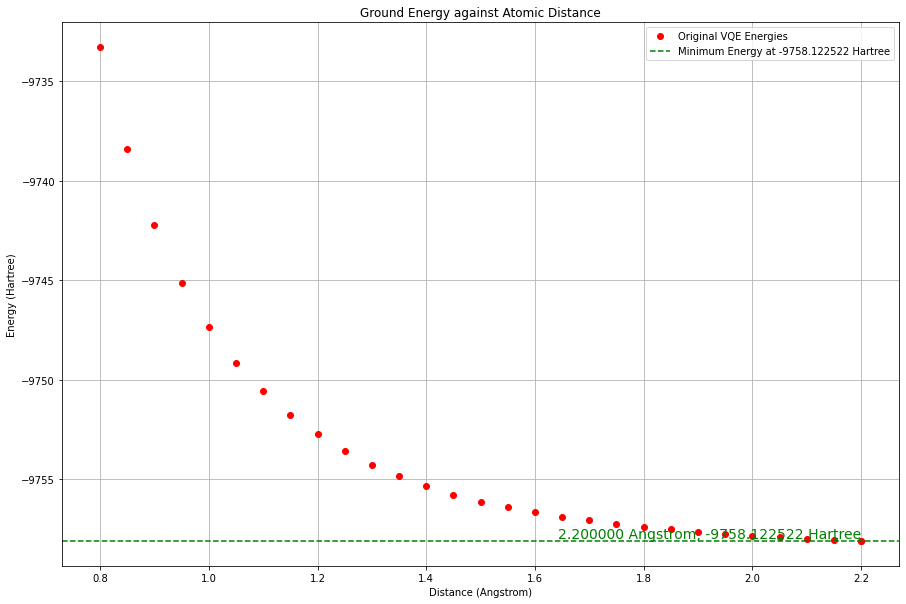

The minimum energy is -9758.122522 Hartree at a distance of 2.200000 Angstrom


In [25]:
energies = np.array(energies)
min_energy = energies.min()
min_energy_distance = distances[energies.argmin()]

plt.figure(figsize=(15, 10))
plt.plot(distances, energies, 'o', label='Original VQE Energies', color='red')

plt.axhline(min_energy, color='green', linestyle='--', label=f'Minimum Energy at {min_energy:.6f} Hartree')
plt.scatter(min_energy_distance, min_energy, color='green')
plt.text(distances[-1], min_energy, f'{min_energy_distance:.6f} Angstrom, {min_energy:.6f} Hartree', color='green', fontsize=14, ha='right', va='bottom')


plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Ground Energy against Atomic Distance')
plt.legend()
plt.grid(True)
plt.show()

print(f"The minimum energy is {min_energy:.6f} Hartree at a distance of {min_energy_distance:.6f} Angstrom")